# ML-2 Обучение с учителем. Регрессия
###  Содержание <a class="anchor" id=0></a>
- [1. Введение](#1)
- [2. Линейная регрессия. Аналитическое решение](#2)
- [2.1 Аналитическое решение с помощью NUMPY](#2-1)
- [2.1 Аналитическое решение с помощью SKLEARN](#2-2)
- [3. Метрики регрессии. Недостатки аналитического решения](#3)
- [3.1 Расчёт метрик на Python](#3-1)
- [3.2 Недостатки аналитического решения ](#3-2)
- [4. Линейная регрессия. Численные решения](#4)
- [4.1 Численные решения на python](#4-1)
- [4.2 Сравнение аналитического и числовово методов](#4-2)
- [5. Дилемма смещения и разброса. Полигональные признаки. Регуляризация](#5)
- [5.1 Смещение и разброс.](#5)
- [5.2 Полиномиальные признаки](#5-2)
- [5.3 Регуляция](#5-3)
- [6. Линейная регрессия. Практика](#6)
- [7. Итоги](#7)

# 1. Введение <a class="anchor" id=1></a>

[к содержанию](#0)

<img src=ml2_img1.png width=900>

В категории обучения с учителем модели можно условно разделить на следующие основные типы:

* **Линейные модели:** линейная регрессия (для задачи регрессии) и логистическая регрессия (для задачи классификации) и производные от них.
* **«Древесные» модели:** дерево решений и производные от него. 
* **Метрические алгоритмы:** метод ближайших соседей и производные от него.
* **Байесовские методы:** метод наивного Байеса и производные от него.
* **Ансамблевые методы:** композиции из методов (бэггинг, стекинг, бустинг).

В этом модуле мы поговорим о **линейных моделях** (но на самом деле ими не ограничимся), которые позволяют решать задачу регрессии.

>**Линейные модели** — это модели, отображающие зависимость целевого признака от факторов в виде линейной взаимосвязи.

<img src=ml2_img2.png width=900>

>На данном графике мы видим зависимость цены товара от его размера. Из диаграммы рассеяния видно, что в среднем точки расположены на одной прямой линии. То есть зависимость линейная.

Подкласс линейных моделей в свою очередь содержит множество конкретных моделей. В библиотеке `sklearn`, которую мы будем использовать, все линейные алгоритмы содержатся в модуле [linear_model](https://scikit-learn.ru/1-1-linear-models/). 

# 2. Линейная регрессия. Аналитическое решение <a class="anchor" id=2></a>

[к содержанию](#0)

`Регрессия` — это класс задач обучения с учителем, когда по определённому набору признаков объекта необходимо предсказать числовую целевую переменную.

`Цель обучения` — построить модель, которая бы отражала зависимость между признаками и целевой числовой переменной.

Когда зависимость принимается линейной, такая модель называется `линейной регрессией`.

## ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛИНЕЙНОЙ РЕГРЕССИИ

**Линейная регрессия** (`Linear Regression`) — одна из простейших моделей для решения задачи регрессии. Главная гипотеза состоит в том, что рассматриваемая зависимость является линейной.

Общий вид модели в случае, когда целевая переменная зависит от `m` факторов, будет иметь следующий вид:

<img src=ml2_img3.png>

Давайте разбираться, что в этом выражении значит каждая из переменных. Начнём с простого — с двумерного случая.

### 2D-СЛУЧАЙ

Для начала поговорим о самом простом случае, когда у нас есть один фактор и зависящий от него целевой признак. Геометрически такая зависимость представляет собой координатную плоскость, где мы отмечаем точки по оси `x` и соответствующие им точки на оси `y`.

>Рассмотрим задачу из нефтяной отрасли. Есть набор данных, где представлены данные о средней пористости скважин (в процентах) и добыче газа на этих скважинах в сутки (в миллионах кубических футов). 

Нам бы хотелось построить модель, которая опишет зависимость и позволит по известной пористости скважин предсказывать неизвестную выработку газа.

Зависимость целевого признака от фактора представлена на диаграмме рассеяния (см. ниже). Пористость скважины отложена по оси абсцисс — `Porosity (%)`, а добыча газа — по оси ординат, `Gas production (Mcf/day)`.

<img src=ml2_img4.png>

Из диаграммы отчётливо видно, что с ростом пористости скважины растёт добыча газа. Причём растёт она преимущественно линейно: основная масса точек находится на одной прямой.

>Идея! Давайте проведём через точки прямую линию так, чтобы она максимально хорошо описывала зависимость.

Для этого сначала вспомним уравнение прямой из школьного курса математики:

`y = kx + b`

где:

* `x` — это некоторый фактор, от которого зависит целевая переменная `y`. В нашем случае, `x` — это пористость скважины, а `y` — добыча газа.
* `k` — коэффициент наклона прямой (**тангенс угла наклона**). Если `k > 0`, это означает, что угол наклона прямой острый и прямая возрастает. Если `k < 0`, угол наклона тупой и прямая убывает.
* `b` — коэффициент смещения прямой по оси `y`. Он будет соответствовать значению `y` при `x = 0`. То есть это точка пересечения прямой и оси `Y`.

<img src=ml2_img5.png>

<img src=ml2_img6.png>

Это уравнение и есть двумерная модель линейной регрессии. Зная коэффициенты `k` и `b`, мы можем подставить в него любую пористость скважины `x` и получить предсказание добычи газа `y`.

Однако в машинном обучении приняты немного другие обозначения. Фактическое значение целевой переменной обозначается как `y`, а вот предсказанное моделью — `y^`. Также для удобства коэффициенты `k`и `b` приведём к единому обозначению: `w0 = k` и `w1 = b`. Тогда уравнение модели линейной регрессии запишется в виде:

<img src=ml2_img7.png>

>**Примечание. Коэффициенты `w0` и `w1` называются параметрами линейной регрессии**.

Остаётся только один вопрос: откуда, собственно, взять параметры `w0` и `w1`? Обсудим этот вопрос чуть позже.

А пока представим, что параметры мы нашли. В таком случае можно построить прямую, которая опишет нашу зависимость. Пусть коэффициенты составляют (мы их нашли сами по методу наименьших квадратов, о котором поговорим ниже):

`w0 = -2.94`

`w1 = 287.7`

Тогда модель будет иметь следующий вид:

`y^ = 287.7x - 2.94`

Если подставлять значения конкретные значения пористости `x` в модель, можно построить прямую, которая описывает исходную зависимость. Это и будет графическая интерпретация нашей модели:

<img src=ml2_img8.png>



### 3D-СЛУЧАЙ

Теперь представим, что у нас не один фактор, а два. Например, помимо пористости скважины, мы дополнительно знаем ещё и о её хрупкости в процентах. То есть у нас теперь есть два фактора: `x1` — пористость и `x2` — хрупкость.

Можно отобразить такую зависимость добычи газа от этих факторов в трёхмерном пространстве в виде диаграммы рассеяния:

<img src=ml2_img9.png>

В таком случае в выражение для модели добавится ещё одна переменная`x2` и соответствующий ей коэффициент `w2`:

Опять же, представим, что параметры модели мы нашли и они равны:

`w0 = -2003`

`w1 = 302.3`

`w1 = 31.38`

Тогда модель будет иметь следующий вид:

`y^ = 302.2x1 + 31.38x2 - 2003`

Это была алгебра — теперь перейдём к геометрии. Геометрически данное уравнение описывает плоскость в трёхмерном пространстве с осями `x1` и `x2`, `w0` — смещение плоскости по вертикальной оси, а коэффициенты `w1` и `w2` — коэффициенты наклона этой плоскости к осям `x1` и `x2`. 

То это это будет плоскость, которая подстроена под точки в трёхмерном пространстве:

<img src=ml2_img10.png>

## ОБЩИЙ СЛУЧАЙ

А что если факторов не два, а больше: 3, 15, 100? Тут-то мы и приходим к общему виду модели линейной регрессии, который вводили в самом начале. Пусть у нас есть `m` факторов `{x1, x2, ..., xm}`, от которых зависит целевая переменная `y`.

<img src=ml2_img11.png>

В геометрическом смысле данное уравнение описывает плоскость в `(m - 1)`-мерном пространстве (`m` факторов + `1` целевой признак отложены по осям координат). Такую плоскость называют **гиперплоскостью**.

Абстрактное `(m - 1)`-мерное пространство, конечно же, невозможно отобразить графически и сложно даже представить, как оно выглядит. Но нам это и не нужно. Все операции в таком пространстве аналогичны операциям в двумерном или трёхмерном пространстве.

>Для понимания принципа работы мы будем рассматривать только прямую в двумерном пространстве, а результат уже обобщать на случай с большей размерностью.

Стоит отметить, что в `DS` мы, как правило, работаем с большим количеством факторов (больше двух), которые описывают данные, поэтому отобразить модель в геометрическом пространстве не получится, но важно понимать, что представляет собой сама модель.

## ПОИСК ПАРАМЕТРОВ ЛИНЕЙНОЙ РЕГРЕССИИ: МЕТОД НАИМЕНЬШИХ КВАДРАТОВ

>Теперь мы знаем, как выглядит модель линейной регрессии в общем случае: это простое линейное выражение, подставляя в которое значения факторов, можно найти целевую переменную. Это линейное выражение соответствует прямой, плоскости или гиперплоскости в зависимости от количества признаков.

Остаётся вопрос: откуда взять коэффициенты, которые стоят при `x`?

Прямую же можно провести как угодно. Вот например несколько прямых, построенных с различными случайными коэффициентами:

<img src=ml2_img12.png>

Какие параметры будут наилучшими?

Для ответа на этот вопрос давайте вспомним схему обучения моделей машинного обучения по принципу минимизации эмпирического риска, которую мы рассматривали в предыдущем модуле:

<img src=ml2_img13.png width=900>

Согласно данной схеме обучения, поиск параметров производится путём минимизации некоторой **функции ошибки**. Математически мы пытаемся с помощью методов оптимизации найти такие параметры, чтобы ошибка была наименьшей из возможных.

Осталось только понять: **где взять эту функцию ошибки**? Ответ кроется в картинке ниже. Давайте представим, как могла бы выглядеть прямая в двумерном пространстве, проведённая, например, через пять точек:

<img src=ml2_img14.png>

>Что вообще есть **ошибка**? В самом простом понимании это расхождение между истиной и предсказанием.

Чтобы не учитывать знак расхождения, можно взять модуль разницы между истинным значением и предсказанным (тем, что лежит на прямой). Рассчитать ошибки  `e_i` (на рисунке они отмечены красными отрезками) для всех пяти точек можно следующим образом:

<img src=ml2_img15.png>

>Тут-то математики и столкнулись с проблемой. Оказывается, если пытаться решить эту оптимизационную задачу классическими способами (через условия экстремума функции), то поиск решения будет противоречить основным законам математического анализа. Почему? Обсудим это в модулях по математике, когда будем решать оптимизационные задачи.

<img src=ml2_img16.png>

Математике известно решение данной задачи оптимизации. Метод поиска параметров линейной регрессии называется методом наименьших квадратов (сокращённо — `МНК`) и был изобретён **Гауссом** ещё в **1795 году**. В английской литературе часто можно встретить аббревиатуру `OLS` (`Ordinary Least Squares`).

>Решать саму задачу поиска минимума функции мы сейчас не будем, так как пока что не владеем достаточными для её решения знаниями о частной производной и условиях экстремума функции многих переменных, но приведём финальный ответ, полученный для общего случая.

Итак, пусть у нас есть матрица `X`, в которой по строкам собрано `n` наблюдений, а по столбцам отложено `m` факторов — по сути, это обычный, привычный нам `DataFrame`. К каждому примеру из таблицы `X` есть ответ `y`.

Зависимость между факторами и целевым признаком принята линейной, то есть рассматривается обучение модели линейной регрессии:

<img src=ml2_img17.png>

Мы хотим найти наилучшую оценку для `w0`, `w1`, `w2`, ...m `w_m`.

>Примечание. Для того чтобы конечная запись формулы была короче и можно было включить в вектор `w-` коэффициент смещения прямой `w0`, в матрицу `X` первым добавляют столбец, полностью состоящий из единиц. Это связано со спецификой матричного умножения, о котором мы поговорим далее в курсе.

Согласно методу наименьших квадратов, аналитическое выражение для поиска вектора коэффициентов уравнения линейной регрессии имеет вид:

<img src=ml2_img18.png>

Саму процедуру обращения матриц мы будем рассматривать в модуле по линейной алгебре. Сейчас же для проведения этой операции мы будем использовать библиотеку numpy, которая позволяет очень быстро и просто обращать матрицы.

# АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ NUMPY <a class="anchor" id=2-1></a>

[к содержанию](#0)

Перейдём к практической части. Давайте научимся строить аналитическое решение линейной регрессии по `МНК` в `Python`.

Вот какие этапы нам предстоит пройти, чтобы построить свою модель:

1. Загрузить данные и проанализировать датасет на предмет пропусков.
2. Подготовить данные для подачи в модель: избавиться от пропусков, если они есть, и перекодировать категориальные признаки, если они представлены текстом.
3. Построить модель. Будем строить несколько моделей линейной регрессии: первую — на одном признаке, вторую — на всех доступные признаках.
4. Оценить качество модели.

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
%matplotlib inline
plt.style.use('seaborn') #установка стиля matplotlib

Будем работать с датасетом из библиотеки `sklearn` о домах в Бостоне. Этот набор данных содержит информацию, собранную службой переписи населения США и касающуюся жилья в районе Бостона, штат Массачусетс.

Данный датасет содержится в модуле `datasets` библиотеки `sklearn`. Давайте загрузим датасет с помощью функции `load_boston()` и выведем его описание, обратившись по ключу `'DESCR'`:

In [2]:
from sklearn.datasets import load_boston 
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

c:\Users\AubakirovMA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

В данном описании говорится, что у нас есть `506` участков с жилыми домами, которые описываются `13`-ю признаками. На каждом из участков находится несколько домов. Измерены общие показатели по каждому из участков, в том числе медианная стоимость.

Задача — научить модель предсказывать медианную стоимость дома на участке.

`CRIM` — уровень преступности на душу населения по городам.;
`ZN` — доля земли под жилую застройку, разделённая на участки площадью более 25 000 кв. футов;
`INDUS` — доля акров, которые принадлежат предприятиям, не связанным с розничной торговлей, на город;
`CHAS` — фиктивная переменная реки Чарльз (1 — если участок прилегает к реке; 0 — в противном случае);
`NOX` — концентрация оксидов азота (в десятимиллионных долях);
`RM` — среднее количество комнат в доме;
`AGE` —доля зданий, построенных до 1940 г. и занимаемых владельцами;
`DIS` — взвешенные расстояния до пяти бостонских центров занятости;
`RAD` — индекс доступности радиальных автомобильных дорог;
`TAX` — полная ставка налога на имущество за каждые 10 000 долларов стоимости;
`PTRATIO` — соотношение учеников и учителей по городам;
`B` — 1000 (`Bk` — 0.63) , где `Bk` — доля граждан афроамериканского происхождения по городам;
`LSTAT` — процент населения с низким статусом;
`MEDV` — медианное значение стоимости домов, занимаемых владельцами, в тысячах долларов США (целевой признак).

Составим `DataFrame` из наших данных. Для этого обратимся по ключу '`data`' к загруженным данным и получим numpy-массив, в котором содержится информация обо всех признаках, а по ключу '`feature_names`' содержатся названия признаков. Обратившись по ключу '`target`', можно получить numpy-вектор со значениями целевой переменной — медианной стоимости занимаемых домов (`MEDV`).

In [3]:
#создаём DataFrame из загруженных numpy-матриц
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
#добавляем в таблицу столбец с целевой переменной
boston_data['MEDV'] = boston.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


>Примечание. Модель линейной регрессии требует, чтобы в подаваемых ей на вход данных не было пропущенных значений. Поэтому если в ваших данных окажутся пропуски, обязательно заранее позаботьтесь о них (способы мы изучали в модуле по очистке данных).

Итак, в наших данных нет пропусков, а значит их можно подавать в модель, чтобы обучить её предсказывать целевой признак (признак MEDV).

>Также модель не умеет работать с категориальными признаками, представленными в виде типа `object`. Прежде чем подавать в модель линейной регрессии категориальные признаки, необходимо произвести кодировку категорий с помощью уже знакомых вам методов кодирования.

Давайте начнём с простого. Построим линейную регрессию на одном признаке. Выберем признак, который имеет наиболее высокую линейную взаимосвязь. Для этого рассчитаем корреляцию признаков с целевой переменной и выберем наиболее влиятельный.

Для лучшего восприятия давайте построим столбчатую диаграмму для модульного значения корреляций:

>Примечание. Мы могли визуализировать матрицу корреляций, однако сейчас нас интересует только связь факторов с целевым признаком, поэтому нагляднее будет воспользоваться столбчатой диаграммой.

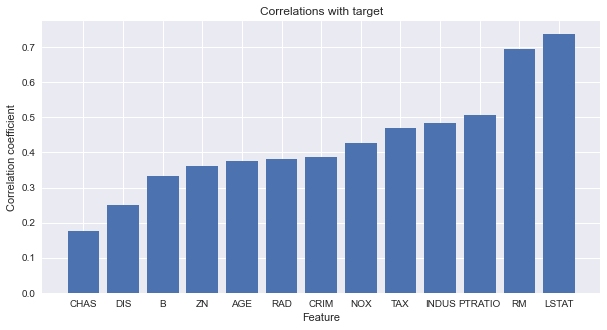

In [9]:
#Вычисляем модуль корреляции
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('MEDV')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

Итак, самый коррелированный по модулю с медианной ценой (MEDV) признак — процент населения с низким статусом (LSTAT). Давайте построим линейную регрессию, используя этот признак.

>Примечание. Построить линейную регрессию = обучить линейную регрессию = найти её параметры.

Вспоминаем нашу формулу аналитического решения по методу наименьших квадратов:

<img src=ml2_img19.png>

Что есть `X` и `y`? Это матрица из примеров (матрица наблюдений) и вектор правильных ответов к ним соответственно. У нас матрица `X` — это таблица, состоящая из одного столбца (`LSTAT`), а `y` — столбец с медианными ценами (`MEDV`):

In [20]:
X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов
X.head()
#y.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


>Примечание. Двойные квадратные скобки `boston_data[['LSTAT']]` позволяют выбрать признак из `DataFrame`, сохранив его в виде таблицы. Это важно, так как в формуле `МНК`  — это матрица.

У нас есть все компоненты формулы, чтобы найти параметры модели. Давайте напишем функцию `linear_regression()`, в которой реализуем вычисления коэффициентов. Аргументами функции будут матрица наблюдений `X` и вектор ответов `y`, а возвращать она будет вектор параметров `w`.

Матричные вычисления легче всего реализовать через библиотеку `numpy`.

Для начала вспомним, что для вычисления свободного члена `w0` необходимо добавить в таблицу столбец, полностью состоящий из единиц. Такой столбец можно создать с помощью знакомой нам функции [ones()](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) из библиотеки `numpy`, а присоединить его к таблице `X` поможет функция [column_stack()](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html).

Матричное умножение в numpy реализуется с помощью оператора `@`. Транспонирование осуществляется через `.T`, а обратная матрица вычисляется с помощью функции [inv()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) из модуля `linalg` (модуля для линейной алгебры).

In [42]:
def linear_regression(X, y):
    #Создаём вектор из единиц
    ones = np.ones(X.shape[0])
    #Добавляем вектор к таблице первым столбцом
    X = np.column_stack([ones, X])
    #Вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    #Вычисляем вектор коэффициентов
    w = Q @ X.T @ y
    return w

Осталось только вызвать нашу функцию и передать в неё нашу таблицу примеров `X` и столбец правильных ответов `y`. Вычислим вектор параметров и выведем его на экран:

In [16]:
#Вычисляем параметры линейной регрессии
w = linear_regression(X, y)
#Выводим вычисленные значения параметров в виде вектора
print('Vector w: {}'.format(w))
#Выводим параметры с точностью до двух знаков после запятой
print('w0: {:.2f}'.format(w[0]))
print('w1: {:.2f}'.format(w[1]))
# Vector w: [34.55384088 -0.95004935]
# w0: 34.55
# w1: -0.95

Vector w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95


Итак, мы получили значения коэффициентов уравнения прямой. С точностью до сотых они равны:

`w0 = 34.55`

`w1 = -0.95`

А значит сама модель будет иметь вид:

`y = 34.55 - 0.95x1`

Самое приятное в модели линейной регрессии — то, что её коэффициенты можно проинтерпретировать. 

Коэффициент `w0 = 34.55` имитирует влияние сторонних факторов, которые не учтены в модели. Это значение медианной цены домов на участке, если бы значение процента населения с низким статусом было равно `0`. 

Коэффициент `w1 = -0.95` означает, на сколько в среднем изменится медианная цена (в тысячах долларов) при увеличении низкостатусного населения на 1 единицу. То есть если количество низкостатусного населения увеличится на `1 %`, то медианная цена зданий на участке упадёт на `0.95` тысяч долларов. Можно сказать, что каждый новый процент низкостатусного населения уменьшает медианную цену на `0.95` тысяч долларов.

Теперь, если в данных появится новый участок Бостона с известной долей низкостатусного населения, мы сможем предсказать значение медианной стоимости домов простой подстановкой значений в модель:

In [21]:
#Задаём процент низкостатусного населения
x_example = 5.18 
#Делаем предсказание
y_predict = w[0] + w[1] * x_example
print('Predicted value: {:.2f}'.format(float(y_predict)))
#Predicted value: 29.63

Predicted value: 29.63


Так как мы работаем с одним фактором, то можем построить визуализацию нашей модели.

Давайте напишем функцию `plot_regression_2d()`, у которой будет три обязательных аргумента (матрица наблюдений `X`, столбец правильных ответов `y` и столбец с предсказаниями модели `y_pred`) и два аргумента по умолчанию (`xlabel` — подпись оси абсцисс и `ylabel` — подпись оси ординат).

In [23]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда

Сделаем предсказание для всех объектов из таблицы `X`, подставив её в модель линейной регрессии с найденными параметрами, и построим график:

InvalidIndexError: (slice(None, None, None), None)

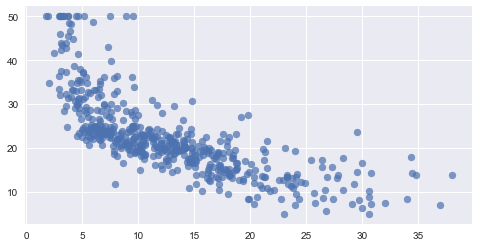

In [24]:
#Делаем предсказание для всех объектов из таблицы
y_predict = w[0] + w[1] * X
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

Как и ожидалось, прямая является убывающей (коэффициент `w1 < 0`), и, если её продолжить влево, она пересечётся с осью ординат в точке `w0 = 34.55`. 

>Итак, мы воспользовались формулой для МНК алгоритма и нашли параметры модели линейной регрессии «вручную», реализовав формулу в виде функции. Отметим, что наша функция универсальна: в неё можно подавать не только матрицу  с одним признаком (LSTAT), но и таблицу, содержащую все признаки, описывающие участки.
>
>Конечно же, никто не строит линейную регрессию «руками», используя формулу МНК. Все дата-сайентисты пользуются библиотеками, такими как sklearn. Давайте посмотрим на реализацию ↓

# АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ SKLEARN <a class="anchor" id=2-2></a>

[к содержанию](#0)

Алгоритм построения модели реализован в библиотеке машинного обучения `sklearn` и находится в модуле `linear_model`. Давайте импортируем этот модуль:

In [25]:
from sklearn import linear_model

В модуле находится класс [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), который реализует аналитическое решение линейной регрессии. Для обучения модели необходимо просто вызвать метод `fit()`, передав в него матрицу наблюдений `X` и вектор правильных ответов `y`.

Данный метод реализует формулу **метода наименьших квадратов** и рассчитает параметры модели самостоятельно. Чтобы получить свободный член `w0` нужно обратиться по атрибуту `intercept_`, а вектор параметров `w1, w2, ..., w_m` будет храниться в атрибуте `coef_` (так как у нас один фактор в матрице `X`, то и коэффициент будет только один):

In [26]:
#Создаём объект класса LinearRegression
lr_lstat = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_lstat.fit(X, y)
 
print('w0: {}'.format(lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm
 
# w0: 34.55384087938311
# w1: [-0.95004935]

w0: 34.55384087938311
w1: [-0.95004935]


>Примечание. Обратите внимание, что мы получили ровно те же самые значения для параметров модели, что является вполне ожидаемым, ведь метод `fit()` у объекта `LinearRegression` реализует ту же самую формулу `МНК`, которую мы прописали в функции `linear_regression()`. Интерпретация коэффициентов остаётся той же.

Модель обучена. А как сделать предсказание? Вручную записывать выражение для модели и подставлять коэффициенты? Конечно же, нет. Для этого есть метод `predict()`. В него необходимо передать матрицу наблюдений, для которых нужно сделать предсказание.

Давайте сделаем предсказание для всех наших наблюдений из таблицы `X` и визуализируем результат с помощью нашей функции `plot_regression_2d()`:

InvalidIndexError: (slice(None, None, None), None)

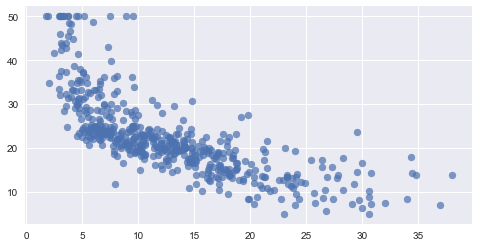

In [27]:
#Предсказываем медианную цену для всех участков из набора данных
y_predict = lr_lstat.predict(X)
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

Получаем тот же самый график, что мы видели ранее, когда реализовывали линейную регрессию вручную.

А что, если мы хотим построить линейную регрессию, используя всю предоставленную информацию, то есть все `13` признаков? Не проблема! Нужно только расширить матрицу наблюдений `X`, добавив в неё остальные признаки и снова обучить модель `LinearRegression`.

Давайте выберем из таблицы `boston` все столбцы, исключая столбец с целевой переменной (`MEDV`). Полученную матрицу `X` и вектор правильных ответов y отправляем в метод `fit()`, чтобы произвести подгонку и найти параметры модели.

In [30]:
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
#Создаём объект класса LinearRegression
lr_full = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_full.fit(X, y)

LinearRegression()

In [29]:
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': lr_full .coef_})
#Составляем строку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr_full .intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Итак, мы получили таблицу с признаками из нашего набора данных и коэффициентами, которые им соответствуют.

Каждый из коэффициентов в модели показывает, на сколько в среднем (согласно модели) изменится медианная цена (в тысячах долларов) при увеличении параметра на единицу. Например, если уровень преступности увеличится на один пункт, то медианная цена зданий на участке упадёт на 0.1 тыс. долларов. А вот увеличение среднего количества комнат на участке (RM) на одну единицу повысит медианную цену на 3.8 тыс. долларов.

>Свободный член (`INTERCEPT`) всё так же имитирует влияние внешних факторов и носит смысл «поправки» модели относительно медианной стоимости.

Итак, мы с вами построили две модели линейной регрессии: `lr_lstat` на одном признаке (`LSTAT`) и `lr_full` — на всех признаках в данных. Хотелось бы сравнить эти модели по их качеству. Может, нам достаточно только знаний о проценте низкостатусного населения, чтобы предсказать медианную цену?

Самая простая идея — визуализировать ошибки. Давайте построим коробчатые диаграммы ошибок моделей. Ошибки будем считать по формуле:

`error_i = y_i - y^`

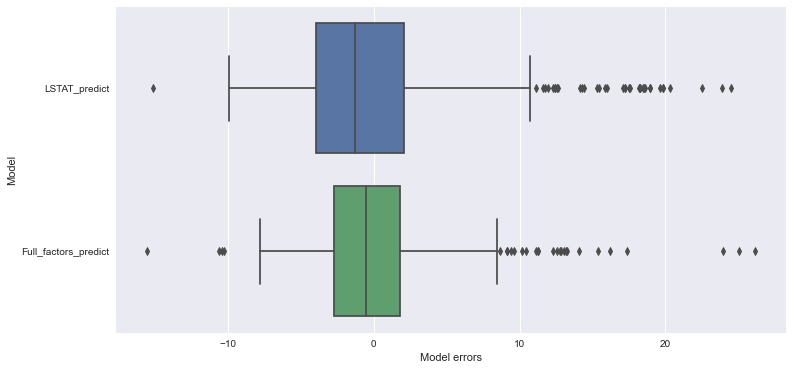

In [31]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на одном факторе LSTAT
y_errors_lstat = y - lr_lstat.predict(boston_data[['LSTAT']])
#Ошибки модели на всех факторах
y_errors_full = y - lr_full.predict(boston_data[features])
#Для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {'LSTAT_predict': y_errors_lstat, 
     'Full_factors_predict': y_errors_full
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

Из построенных диаграмм ошибок видно, что разброс ошибок для модели, построенной на всех признаках, ниже (ящик уже и усы короче), и медиана ошибки также более приближена к `0`. То есть можно сказать, что **визуально качество второй модели выглядит лучше**.

На обеих диаграммах присутствуют точки, сильно выбивающиеся за пределы усов. Это наблюдения, для которых модель допустила очень большую ошибку, по сравнению с основной группой.

Можно предположить, что это объекты, для которых гипотеза о линейной зависимости несправедлива, и линейной модели не хватает для предсказания целевой переменной для таких объектов. О том, как справиться с этой проблемой, мы поговорим чуть позже.

Визуализация — это, конечно, хорошо, но, согласитесь, не очень удобно: визуализация не даёт конкретики — только общие представления об ошибках.

Может быть, есть способ описать качество модели каким-то конкретным числом? Да. Этот показатель называется **`метрикой`**. 

In [34]:
# Новые данные
new_data = pd.DataFrame({'CRIM':[0.35114],
                         'ZN':[0.00000],
                         'INDUS':[7.38000],
                         'CHAS':[0.00000],
                         'NOX':[0.49300],
                         'RM':[6.04100],
                         'AGE':[49.90000],
                         'DIS':[4.72110],
                         'RAD':[5.00000],
                         'TAX':[287.00000],
                         'PTRATIO':[19.60000],
                         'B':[396.90000],
                         'LSTAT':[7.70000]})
new_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.9,7.7


In [39]:
# Предсказания по новым данным
lr_full.predict(new_data)

array([22.86952447])

In [75]:
data = pd.read_csv('50_Startups.zip')

def linear_regression(X, y):
    #Создаём вектор из единиц
    ones = np.ones(X.shape[0])
    #Добавляем вектор к таблице первым столбцом
    X = np.column_stack([ones, X])
    #Вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    #Вычисляем вектор коэффициентов
    w = Q @ X.T @ y
    return w

w = linear_regression(data.drop(['State', 'Profit'], axis=1), data['Profit'])
coef = pd.DataFrame(w, index=list(data.drop(['State', 'Profit'], axis=1).columns.insert(0, 'w0')))
coef

,0
w0,50122.192990
R&D Spend,0.805715
Administration,-0.026816
Marketing Spend,0.027228


# 3. Метрики регрессии. Недостатки аналитического решения <a class="anchor" id=3></a>

[к содержанию](#0)

>**`Метрика`** — это численное выражение качества моделирования.

Для оценки качества решения задачи регрессии существует множество метрик. Давайте рассмотрим самые основные и часто используемые.

## МЕТРИКИ РЕГРЕССИИ

Будем рассматривать метрики для задачи регрессии на следующем примере. Возьмём первые пять наблюдений из нашей таблицы и предсказанные для них моделью `lr_full` ответы:

`y = (24.0, 21.6, 34.7, 33.4, 36.2)`

`y^ = (29.82, 25.87, 30.73, 31.76, 29.49)`

На этих значениях мы будем рассматривать следующие метрики:

## 1. Средняя абсолютная ошибка — `MAE` (Mean Absolute Error)

Это самый простой и уже знакомый вам показатель. Чтобы посчитать данную метрику, нужно найти все остатки (разницы между предсказанным значением и реальным), взять от каждого из них модуль, сложить их и поделить на количество. Иными словами, нам нужно найти среднее арифметическое модуля отклонения предсказанного значения от реального.

<img src=ml2_img20.png>

То есть для нашего примера из пяти наблюдений в среднем модель ошибается на `4.482` тысячи долларов.

Много ли это? Хороший вопрос, на который без эксперта-оценщика недвижимости будет сложно дать ответ. Однако можно попробовать посчитать ошибку в процентах, ведь в процентах всё воспринимается легче, и для этого нам пригодится следующая метрика — MAPE.



## 2. Средняя абсолютная ошибка в процентах — `MAPE` (Mean Absolute Percent Error)

Для её вычисления мы делим модуль разницы между предсказанием алгоритма и истинным значением на истинное значение. Затем складываем все результаты (для каждого объекта), делим на количество и умножаем на 100 %.


<img src=ml2_img21.png>

Таким образом, на первых пяти наблюдениях модель в среднем ошибается на `15.781 %`. Это довольно неплохой результат.



## 3. Средняя квадратическая ошибка — `MSE`

Данный показатель мы используем в линейной регрессии в качестве функции потерь, но ничто не мешает нам также использовать его и в качестве метрики.

Логика вычисления данной ошибки очень похожа на предыдущую. Разница лишь в том, что вместо модуля разности между предсказанным и реальным значениями мы берём квадрат этого модуля:

<img src=ml2_img22.png>

Таким образом, для нашего примера квадрат отклонения составляет `22.116` тысяч долларов в квадрате.

Согласитесь, не очень понятно, о чём идет речь. Однако данная метрика является популярной, так как позволяет `«штрафовать»` модель за очень большие ошибки.

>Что значит `«штрафовать»`? 
>
>Например, расхождение в `200` единиц в метрике `MSE` воспринимается как `200^2`, а в метрике `MAE` это расхождение воспринимается как `200`. Поэтому, если у нас есть две модели, но одна из них допускает большие ошибки, эти ошибки становятся ещё больше при расчёте метрики `MSE`, и нам легче сравнить модели между собой.
>
>Но в то же время это и проклятие `MSE`. Если в данных присутствуют выбросы, метрика может быть необъективной. Если модель будет утверждать, что цена здания — `30 тысяч долларов`, а в наборе данных ему соответствует цена в `3 миллиона долларов`, то при возведении такой ошибки в квадрат получится `9 миллионов`, что может сбить с толку исследователя. Необходимо скептически относиться к данной метрике, если вы не проводили исследование данных на предмет наличия выбросов.

## 4. Корень из средней квадратической ошибки — RMSE (Root Mean Squared Error)

Для получения `RMSE` надо просто извлечь квадратный корень из `MSE`:

<img src=ml2_img24.png>

## 5. Коэффициент детерминации (R^2)

Все рассматриваемые ранее метрики имели масштаб от `0` до `+∞`. Чем это плохо?

А что если нам скажут, что `MSE` для модели составляет `32`? Должны ли мы улучшить модель, или она достаточно хороша? А что если `MSE = 0.4`?

На самом деле, трудно понять, хороша модель или нет, не сравнив её показатели с теми же показателями других моделей.

Коэффициент детерминации, или `R^2`, является ещё одним показателем, который мы можем использовать для оценки модели. Он тесно связан с `MSE`, но его преимущество в том, что `R^2` всегда находится в промежутке между `-∞` и `1`.

<img src=ml2_img25.png>

Есть ещё одна интерпретация данной метрики. Статистически показатель `R^2` описывает, какую долю информации о зависимости (дисперсии) смогла уловить модель.

Удовлетворительным `R^2` считается показатель выше `0.5`: чем ближе к `1`, тем лучше. Отрицательные значения `R^2` говорят о том, что построенная модель настолько плоха, что лучше было бы присвоить **всем ответам среднее значение**.

Давайте обобщим всё вышесказанное в виде таблицы:

<img src=ml2_img26.png>

## РАСЧЁТ МЕТРИК НА PYTHON <a class="anchor" id=3-1></a>

[к содержанию](#0)

Настало время проверить качество построенных нами ранее моделей линейной регрессии: `lr_lstat` и `lr_full`.

Весь набор функций для вычисления метрик в `sklearn` находится в модуле [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). Давайте его импортируем:

In [76]:
from sklearn import metrics

Функции, которые нам понадобятся:

* `mean_absolute_error()` — расчёт `MAE`;
* `mean_square_error()` — расчёт `MSE`;
* `mean_absolute_percentage_error()` — расчёт `MAPE`;
* `r2_score()` — расчёт коэффициента детерминации `R^2`.

В каждую из функций достаточно передать правильные ответы и предсказания, и функция вернёт рассчитанную метрику.

>Примечание. Для расчёта метрики `RMSE` нет специальной функции, однако мы знаем, что для её расчёта достаточно извлечь квадратный корень из MSE.
>
>Из-за особенностей реализации функция `mean_absolute_percentage_error()` возвращает результат не в процентах, а в долях. Чтобы отобразить результат в процентах, необходимо умножить его на `100`.

Давайте вычислим метрики и выведем их на экран, округлив до третьего знака после запятой. Начнём с модели `lr_lstat`: сделаем предсказание на основании признака `LSTAT` и передадим истинные и предсказанные медианные цены в функции для расчёта метрик:

In [79]:
#Делаем предсказание по признаку LSTAT
y_predict_lstat = lr_lstat.predict(boston_data[['LSTAT']])
#Рассчитываем MAE
print('MAE score: {:.3f} k$'.format(metrics.mean_absolute_error(y, y_predict_lstat)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} k$'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_lstat))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict_lstat) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_lstat)))

MAE score: 4.505 k$
RMSE score: 6.203 k$
MAPE score: 21.352 %
R2 score: 0.544


Проделываем ту же самую операцию для второй модели линейной регрессии, `lr_full`:

In [80]:
#Делаем предсказание по всем признакам
y_predict_full = lr_full.predict(boston_data[features])
#Рассчитываем MAE
print('MAE score: {:.3f} k$'.format(metrics.mean_absolute_error(y, y_predict_full)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} k$'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_full))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict_full) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_full)))

MAE score: 3.271 k$
RMSE score: 4.679 k$
MAPE score: 16.417 %
R2 score: 0.741


Сравним полученные результаты:

* `MAE`: в среднем первая модель ошибается на  `4.505` тыс. долларов, а вторая — на `3.271` тыс. долларов.
* `RMSE`: среднеквадратичное отклонение первой модели от истинных ответов составляет `6.203` тыс. долларов, а второй — `4.679`.
* `MAPE`: первая модель ошибается на `21.352 %`, а вторая — на `16.417 %`.
* `R^2`: доля объясняемой информации (дисперсии), которую улавливает первая модель, — `0.544`, а вторая — `0.741`.
Очевидно, что по всем метрикам вторая модель, построенная на основе всех признаков в данных, превосходит первую.

## НЕДОСТАТКИ АНАЛИТИЧЕСКОГО РЕШЕНИЯ <a class="anchor" id=3-2></a>

[к содержанию](#0)

Ранее мы с вами рассмотрели, что такое модель линейной регрессии, и научились рассчитывать её параметры с помощью аналитического подхода — метода наименьших квадратов.

<img src=ml2_img27.png>

Метод наименьших квадратов позволяет очень просто получить коэффициенты, подставив таблицу в формулу. Вот, собственно, и всё «обучение». 

>Существует теорема [Гаусса-Маркова](https://ru.wikipedia.org/wiki/Теорема_Гаусса_—_Маркова), которая говорит о том, что, если выполнены все условия теоремы, МНК всегда находит оптимальные оценки параметров. Мы ещё вернемся к этой теореме, когда будем говорить об МНК в модулях по линейной алгебре.

Казалось бы, относительно простая математика: надо всего лишь перемножить матрицы между собой и получить ответ. Особенно простой эта задача должна быть для компьютера. Но нам так кажется, поскольку мы ранее не сталкивались с матричным умножением и будем говорить о нём только в модулях по линейной алгебре.

>Оказывается, у такого простого подхода есть один большой минус — это работа с **большим количеством признаков**.

Давайте внимательно посмотрим на операцию обращения матриц (возведение в степень -1):

<img src=ml2_img28.png>

Обращение матриц больших размеров может стать очень трудоёмким процессом при работе с большими объёмами данных.

>Второй недостаток МНК — это невозможность инкрементального обучения, или обучения в режиме реального времени.

**Что это такое?**

Представьте, что мы построили модель, но собираемся её уточнять в процессе эксплуатации. К нам приходят всё новые данные, и мы должны изменять параметры модели, подстраиваясь под новые зависимости.

Если мы используем метод `fit()` для модели `LinearRegression` и передадим в него новые данные, то коэффициенты модели будут рассчитаны по новым данным, а прошлые наблюдения будут забыты. То есть придётся добавлять данные в таблицу и переобучать модель на всех доступных данных ещё раз.

>Первая и вторая проблемы решаются с помощью замены аналитического МНК на численные методы, такие как градиентный спуск.
>
>Третий недостаток МНК больше теоретический и заключается в том, что матрица `Q` в результате вычислений может **не существовать**. Это связано с математическими особенностями вычисления обратной матрицы, которые мы рассмотрим далее в курсе. 
>
>Причина этой проблемы — мультиколлинеарность факторов (сильная корреляционная связь). Из-за этого коэффициенты линейной регрессии становятся слишком большими и модель становится неустойчивой. 
>
>**Проблема решается с помощью `регуляризации`.**

# 4. Линейная регрессия. Числовые решения <a class="anchor" id=4></a>

[к содержанию](#0)

В самом простом двумерном случае мы пытаемся найти такие коэффициенты  уравнения прямой `w0` и `w1`, чтобы средний квадрат ошибки (`MSE`) был минимален.

<img src=ml2_img29.png>

Гауссу удалось найти общее решение для этой оптимизационной задачи и вывести формулу метода наименьших квадратов для поиска коэффициентов.

Но можно пойти другим путём, не аналитическим (вывод формулы «в лоб»), а численным (итерационное приближение функции к минимуму).

Самым популярным численным методом оптимизации, используемым в машинном обучении, является алгоритм градиентного спуска.

>Градиентный спуск (`Gradient descent`) — самый используемый [алгоритм](https://neurohive.io/ru/osnovy-data-science/gradient-descent/) минимизации функции потерь. Он применяется почти в каждой модели машинного обучения и является наиболее простым в реализации из всех методов численной оптимизации.

С градиентным спуском мы будем детально знакомиться в модулях по оптимизации и даже реализуем его своими руками. Сейчас же нам важно усвоить принцип работы, чтобы понимать, какими параметрами алгоритма мы можем управлять при его использовании в коде.

Начнём обзор алгоритма немного издалека.

Представим, что мы находимся на некоторой холмистой местности и нам надо добраться до самой низкой точки, но делаем мы это вслепую, то есть не знаем сам ландшафт. Назовём эту точку целью.

<img src=ml2_img30.png>

Давайте опишем, как мы будем искать эту точку. Для начала необходимо задать начальную точку, из которой мы, собственно, стартуем. Далее мы двигаемся в сторону крутизны склона. Если склон круче справа, надо сделать шаг вправо, если склон круче слева, надо сделать шаг влево. Повторяем шаги до тех пор, пока не достигнем самой низкой точки.

У вас мог возникнуть вопрос: как определить, что мы достигли цели — самой низкой точки? В этой точке крутизна склона с обеих сторон равна 0 или близка к нему (ровная поверхность). Можно использовать эту информацию как точку остановки нашего алгоритма.

Описанный нами алгоритм можно перевести на язык математики. Он то и будет называться алгоритмом **градиентного спуска**.

Наша функция потерь, которая зависит от параметров модели, — это аналогия ландшафта местности. Пространство, в котором находится ландшафт, — это пространство параметров нашей модели. То есть это система координат, в которой по осям отложены все возможные значения параметров.

В двумерном случае, когда есть только один параметр, от которого зависит функция потерь, можно построить график функции потерь. Например, для `MSE`, зависящей от одного параметра, график будет иметь вид параболы:

<img src=ml2_img31.png>

Если параметров не один, а два, то функция потерь будет графически представлена в виде поверхности в трёхмерном пространстве. Ниже приведён пример такой поверхности и её вид сверху в виде концентрических кругов:

<img src=ml2_img32.png>

>В общем случае, когда у нас больше параметров модели, мы будем работать в многомерном пространстве. Но в этом нет ничего страшного. Суть поиска минимума от этого не меняется, меняется только сложность функции — структуры ландшафта.

Для линейной регрессии необходимо найти в этом пространстве такие координаты `w0`, `w1`, ... ,`w_m` в которых находится минимум функции потерь.

Как же нам понять, в какую сторону двигаться? Что будет отвечать за направление крутизны склона? На этот вопрос нам ответит математический анализ. В теории анализа функций, зависящих от нескольких переменных, существует понятие градиента.

Математически градиент — это вектор, который состоит из частных производных по параметрам функции.

Он записывается следующим образом:

<img src=ml2_img33.png>

Пусть пока что математическая формализация градиента нам непонятна, но нам важно отметить его ключевую особенность.

>Градиент — это вектор, который показывает направление наискорейшего роста функции, а его длина — это само значение скорости функции в точке.

Если вновь обратиться к примеру с холмами, градиент показывает, с какой скоростью и в каком направлении нужно двигаться из текущей точки, чтобы достичь более высшей точки.

>А теперь время фокусов. Если поставить перед градиентом знак минус `-L(w)`, то мы получим вектор `антиградиента`, который показывает в сторону наискорейшего убывания функции потерь!.

В случае одного параметра:

<img src=ml2_img34.png>

В случае двух параметров:

<img src=ml2_img35.png>

А это и есть то, что нам нужно. С помощью этого знания мы сможем вычислять следующую координату в пространстве — следующую точку, которую нам нужно посетить, чтобы дойти до цели — минимума функции.

Формально это записывается следующим образом (формулу запоминать не нужно):

<img src=ml2_img36.png>

Отдельное внимание стоит уделить коэффициенту `n` (читается как `«эта»`). Это поправочный коэффициент, который носит название темп обучения (`learning rate`).

`Темп обучения` — это основной параметр алгоритма. Он определяет то, насколько сильно мы будем двигать точку. В аналогии с нашим примером с движением по холмам можно сказать, что это коэффициент, обратный сопротивлению ландшафта, по которому мы движемся.

Управляя данным параметром (уменьшая и увеличивая его), мы управляем скоростью движения к точке минимума. Чем больше темп обучения, тем длиннее наши шаги и тем быстрее мы движемся, и наоборот. О том, зачем этот параметр нужен и как выбирать значение , мы поговорим чуть позже.

>**Примечание**. Темп обучения является примером внешнего параметра алгоритма, которым может управлять пользователь. Такие параметры ещё называют **гиперпараметрами**.

Есть ещё одно важное свойство градиента: теоретически в точке минимума длина вектора равна 0, то есть движения не происходит. Это свойство мы можем использовать в качестве критерия остановки нашего алгоритма.

<img src=ml2_img37.png>

Теперь у нас есть все компоненты, чтобы составить алгоритм для обучения модели линейной регрессии методом градиентного спуска. Для простоты возьмём случай, когда мы строим регрессию на основе только одного признака.

Для начала вспомним, как выглядит вид модели линейной регрессии, когда у нас есть только один фактор:

`y = w0 + w1 * x`

У нас есть набор значений фактора `x = (x1, x2, ..., x_m)` и столбец с правильными ответами `y = (y1, y2, ..., y_m)`. Мы пытаемся найти такие коэффициенты прямой, чтобы ошибка предсказания была минимальной. 

Алгоритм градиентного спуска для такой модели будет выглядеть следующим образом: 

* 1. Проинициализировать значения параметров `w0`, `w1`. 

На аналогии наших холмов это будет означать выбор начальной точки в пространстве, из которой мы будем двигаться.

Правильная инициализация параметров — это отдельная история. Например, можно инициализировать все параметры нулями или случайными значениями.

* 2. Повторять до тех пор, пока длина градиента не приблизится к `0`.

На практике полного равенства градиента нулю достичь невозможно из-за численных вычислений, поэтому в качестве остановки задают минимальную границу, ниже которой длина градиента считается достаточной, чтобы остановиться (например, `0.1`, `0.01` или `0.001`). Если длина будет меньше заданной, то алгоритм можно останавливать.

Существуют и другие критерии остановки: например, остановиться, если текущее значение функции потерь < 1.5. Но они используются гораздо реже.

* 2.1. Вычислить градиент функции потерь .

Это будет означать нахождение направления и вектора скорости роста нашего ландшафта. 

Грубо говоря, нужно взять вектор-столбец с примерами  и подставить его в формулу для вычисления градиента функции потерь. Формулы вычисления градиента для наиболее часто используемых функций потерь уже вычислены и заложены в библиотечные реализации.

Далее приведены формулы вычисления градиента для MSE для двух параметров.

<img src=ml2_img38.png>

* 2.2. Обновить параметры модели, сдвинув их в сторону антиградиента.

Из текущей точки необходимо перейти в новую точку, в сторону убывания высоты ландшафта.

Для обновления координат точки используем формулу:

Далее приведены формулы вычисления градиента для MSE для двух параметров.

<img src=ml2_img39.png>

### Давайте подведём промежуточный итог.

`Градиентный спуск` — простой и мощный алгоритм оптимизации, который позволяет итеративно находить минимум функции потерь и тем самым находить оптимальные параметры модели.

Причём функция потерь не обязательно должна быть MSE. Главное требование к функции потерь — это её гладкость во всех точках.

>**Примечание**. С математической точки зрения гладкими называются функции, которые имеют производную во всех точках.

Для нашего пока что обывательского понимания это значит, что функция должна иметь плавный переход из точки в точку. Примеры:

<img src=ml2_img40.png>

>Благодаря своей простоте алгоритм обладает минимальной вычислительной сложностью и работает быстрее, чем метод наименьших квадратов, даже на огромных наборах данных с тысячами признаков.

Однако у градиентного спуска есть одна большая проблема — это **сходимость** алгоритма к точке истинного минимума. Алгоритм может попросту не сойтись к истинному минимуму.

**Сходимость** зависит от многих факторов, главные из которых:

* сложности зависимости и сложности функции потерь;
* выбранный темп обучения;
* выбранная начальная точка (инициализация параметров);
* масштабирование признаков.

Из-за сложной зависимости и сложности самой функции потерь она может иметь несколько видов минимумов: локальные и глобальные.

>**Локальный минимум** — это минимум на какой-то локальной области. 

>**Глобальный минимум** — это минимум на всей области определения функции (на всём ландшафте).

Например, ваши минимальные расходы в онлайн-банке за весь период пользования приложением — это глобальный минимум. А минимальные расходы в приложении за последние шесть месяцев — это локальный минимум. Эти значения могут существенно отличаться.

>Когда мы говорим о функции потерь, нас интересует именно глобальный минимум, то есть тот минимум, которого вообще возможно достичь при управлении параметрами.

Функция потерь с локальным и глобальным минимумом в случае одного параметра:

<img src=ml2_img41.png>

Функция потерь с локальным и глобальным минимумом в случае двух параметров:

<img src=ml2_img42.png>

Проблема градиентного спуска заключается в том, что алгоритм может `«застрять»` в локальном минимуме и не выйти из него.

Застряв в локальном минимуме, мы не найдем настоящие оптимальные значения параметров.

Чтобы частично решить эту проблему используется не классический градиентный спуск, а его модификации. Существует множество модификаций градиентного спуска, и мы будем знакомиться с большей их частью далее в курсе.

В этом модуле мы будем использовать **стохастический градиентный спуск** (`Stochastic Gradient Descent, SGD`). 

В классическом алгоритме мы используем всю выборку и прогоняем её несколько раз через алгоритм, вычисляя градиент функции ошибки, плавно приближаясь к минимуму.

Стохастическая модификация предполагает, что один шаг градиентного спуска производится на основе градиента, рассчитанного не по всей выборке, а только по случайно выбранной части.

То есть мы случайно выбираем несколько строк из таблицы и подставляем их в алгоритм, делаем шаг в сторону минимума и повторяем это множество раз, пока алгоритм не сойдётся к приемлемому значению или пока не закончатся итерации (в реализации **всегда задаётся максимум итераций** на случай, если алгоритм не сойдётся и будет **«блуждать по холмам» вечно**).

Благодаря этому вектор градиента всё время колеблется, и мы прыгаем из точки в точку, а не идём вдоль ровной линии, как это было в классическом градиентом спуске.

На рисунке ниже приведены графики «блуждания» точки в пространстве функции потерь (вид сверху).

<img src=ml2_img43.png>

**В чём выгода?**

Благодаря таким случайным колебаниям у нас появляется больше возможностей «выкарабкаться» из локальных минимумов и дойти до глобального минимума.

>Однако из-за таких скачков есть шанс пропустить и глобальный минимум функции потерь, если скачки будут слишком большими.

Чтобы управлять шагами, как раз и существует параметр **темпа обучения**. Он позволяет управлять размером шага градиентного спуска.

>Даже для обычной выпуклой функции, такой как парабола, градиентный спуск может сходиться медленно, если выбран слишком маленький темп обучения, или не сходиться вообще, если темп слишком большой. Поэтому темп обучения — это один из самых важных внешних параметров, на который мы можем повлиять.

<img src=ml2_img44.png>

Наиболее распространённые значения `n < 1`:  `0.01`, `0.001` и т. д.

Но есть идея получше! Будем брать большой шаг в начале обучения и уменьшать его постепенно, приближаясь к минимуму, чтобы не «выпрыгнуть» из точки минимума.

В реализации стохастического градиентного спуска в `sklearn`, с которым мы будем работать, именно такая идея и используется по умолчанию. Параметр  регулируется в процессе обучения — он уменьшается с ростом числа итераций по формуле:

<img src=ml2_img45.png>

Ещё один важный момент, на который стоит обратить внимание при работе с градиентным спуском — это обязательное масштабирование факторов (приведение факторов к единому масштабу или к единым статистическим характеристикам), если их несколько.

Например, в нашем наборе данных о домах в Бостоне есть признак NOX (концентрация оксидов азота): он изменяется в диапазоне от 0 до 1. Также есть признак LSTAT (процент низкостатусного населения), который изменяется в диапазоне от 0 до 100 %. 

Для градиентного спуска (особенно стохастического) важно, чтобы все факторы были приведены к единому масштабу с помощью нормализации/стандартизации (мы изучали их в модуле EDA-3. «Проектирование признаков»). Иначе в пространстве параметров функция ошибки становится очень растянутой по одной оси, но очень сжатой по другой, и найти её минимум будет очень сложно.

# 4.1 ЧИСЛЕННОЕ РЕШЕНИЕ НА PYTHON <a class="anchor" id=4-1></a>

[к содержанию](#0)

Как и раньше, будем работать с датасетом о домах в Бостоне из библиотеки sklearn.

In [8]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.datasets import load_boston 
boston = load_boston()
#создаём DataFrame из загруженных numpy-матриц
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
#добавляем в таблицу столбец с целевой переменной
boston_data['MEDV'] = boston.target
boston_data.head()

c:\Users\AubakirovMA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Обучим с помощью градиентного спуска линейную регрессию на одном факторе — `LSTAT` (процент низкостатусного населения) — и сравним результат с полученным ранее результатом `МНК`.

In [9]:
X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов

Будем использовать реализацию стохастического градиентного спуска для линейной регрессии из библиотеки `sklearn` — [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html). Она находится в том же модуле `linear_model`.

У класса `SGDRegressor` есть множество параметров. Например, параметр `random_state` отвечает за число, на основе которого происходит генерация  случайных чисел. Напомним, в `SGD` случайность присутствует в инициализации параметров и выборе части из набора данных. Установив значение параметра `random_state` равным определённому числу, мы можем гарантировать одинаковые результаты работы метода при разных запусках. Пусть это будет число `42`.

Для обучения используется метод `fit()`: он запускает работу градиентного спуска для поиска параметров, в него необходимо передать данные и правильные ответы.

>**Примечание**. К сожалению, в `sklearn` нельзя посмотреть то, как происходит поиск оптимальных параметров с помощью `SGD`. Поэтому нет возможности продемонстрировать историю изменения функции потерь. В модулях по оптимизации мы самостоятельно реализуем алгоритм и посмотрим на поэтапную минимизацию.

In [10]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_lstat = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
sgd_lr_lstat.fit(X, y)

SGDRegressor(random_state=42)

Обучение завершено, параметры найдены. Давайте выведем их на экран. Для этого используются уже знакомые вам атрибуты `coef_` и `intercept_`:

In [11]:
print('w0: {}'.format(sgd_lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(sgd_lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm

w0: [34.33010969]
w1: [-0.96193242]


>Примечание. Обратите внимание, что значения параметров немного отличаются от полученных ранее с помощью МНК значений. Для МНК коэффициенты были равны:
>
>* `w0`: [34.55384087938311]
>* `w1`: [-0.95004935]
>
В этом нет ничего удивительного, ведь `МНК` — это аналитический метод, он выдаёт точное решение, а `SGD` — численный, и вычисления останавливаются, когда достигается приемлемая точность.

Давайте с помощью метода predict() сделаем предсказание цены для всех объектов из нашей выборки и построим визуализацию:

InvalidIndexError: (slice(None, None, None), None)

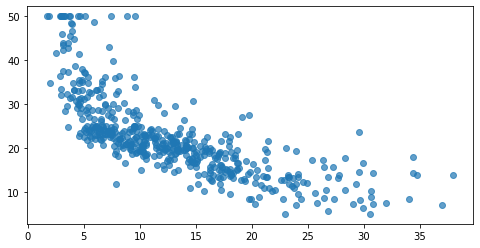

In [13]:
import matplotlib.pyplot as plt
#функция для визуализации регрессии
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда
#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_lstat.predict(X)
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

Можно рассчитать метрики регрессии для полученной модели. Давайте для примера посчитаем `R^2`:

In [15]:
from sklearn import metrics
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.542


Итоговый `R^2` для линейной регрессии, обученной с помощью градиентного спуска, составил `0.542`. Напомним, для той же модели, обученной с помощью `МНК`, метрика была равна `0.544`. То есть доля информации, которую объяснила модель, обученная с помощью градиентного спуска, ниже примерно на `0.002`. Очевидно, в реальных задачах такая разница не имеет значения. 

Теперь попробуем обучить многомерную линейную регрессию с помощью `SGD`. Как и раньше составим полную матрицу наблюдений `X` из всех факторов, которые нам даны. Обучим модель и выведем значения коэффициентов в виде `DataFrame`:

In [16]:
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
 
#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
sgd_lr_full.fit(X, y)
 
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,2.156857e+11
1,ZN,1.248446e+10
2,INDUS,7.277644e+09
3,CHAS,8.306154e+09
4,NOX,-8.413828e+09
5,RM,-3.148182e+10
6,AGE,8.685820e+10
7,DIS,-2.256141e+11
8,RAD,-4.683208e+10
9,TAX,1.892286e+09


Все коэффициенты имеют запредельные значения (`9-11 степени числа 10`). Это типичная картина расходящегося градиентного спуска: алгоритм не достиг точки минимума по каким-то причинам. Такие высокие значения коэффициентов означают, что модель является неустойчивой.

Давайте сделаем предсказание и выведем  для обученной модели:

In [17]:
#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_full.predict(X)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -10590303862129977211224064.000


`R^2` отрицательный. Да ещё какой! Напомним, отрицательный `R^2` говорит о том, что модель абсолютно не описывает зависимости в данных.

В чём же причина? Неужели `SGD` не справился с поиском `14` параметров (свободный член `+13` коэффициентов при факторах)?

>Ответ очень простой — **отсутствие масштабирования**. Как мы уже говорили ранее, при использовании градиентного спуска и его модификаций очень важно масштабировать данные с помощью нормализации или стандартизации. Иначе алгоритм теряется в таком растянутом пространстве из-за неравномерных градиентов.

Давайте стандартизируем наши данные. Воспользуемся классом `StandardScaler` из модуля `preprocessing` библиотеки `sklearn`, который реализует стандартизацию.

In [18]:
from sklearn import preprocessing
 
#Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()
#Производим стандартизацию
X_scaled = scaler.fit_transform(X)
#Составляем DataFrame из результата
X_scaled = pd.DataFrame(X_scaled, columns=features)
X_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


**Попытка №2**. Обучим модель и составим таблицу из её параметров:

In [19]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_full.fit(X_scaled, y)
 
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.870552
1,ZN,0.947112
2,INDUS,-0.116802
3,CHAS,0.730289
4,NOX,-1.894276
5,RM,2.757578
6,AGE,-0.027846
7,DIS,-3.049237
8,RAD,1.957066
9,TAX,-1.305271


Вот теперь результат более схож с реальностью. Сделаем предсказание и посчитаем результирующий `R^2`:

In [20]:
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_full.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.740


Теперь метрика имеет приемлемое значение, а значит градиентный спуск смог сойтись.

>**Важно**! Если вы обучили модель на стандартизованных данных, то и для предсказания необходимо передавать их в стандартизованном виде.

Например, если попытаться сделать предсказание с помощью построенной модели, передав в качестве матрицы наблюдений нестандартизованную таблицу, то ошибки мы не получим, однако значение метрики будет неадекватным:

In [21]:
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_full.predict(X)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -1856.503


<img src=ml2_img46.png>

[документация](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

Давайте посмотрим, что будет, если выставить константный режим управления темпом обучения и задать ему более высокое значение, например 0.1:

In [22]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad = linear_model.SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=0.1, #начальное и постоянное значение темпа обучения
    random_state=42
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -335415038359.635


`R^2 < 0`, то есть `SGD` разошёлся из-за слишком высокого темпа обучения. 

Вот ещё один плохой пример. Что будет, если поставить слишком маленькое значение параметра `eta0`? Например, `0.000001`

In [23]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad2 = linear_model.SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=1e-6, #начальное и постоянное значение темпа обучения
    random_state=42
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad2.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad2.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -1.578


c:\Users\AubakirovMA\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Снова `R^2`, но также мы видим предупреждение (`warning`), которое говорит о том, что алгоритму не хватило количества итераций (`max_iter`), чтобы добраться до минимума. То есть `SGD` не дошёл до точки минимума из-за слишком низкого темпа обучения.

>Так как модель линейной регрессии является довольно простой и исследованной, то значения параметров, которые обладают наибольшей эффективностью, уже установлены по умолчанию (аргументы по умолчанию), но бывают ситуации, когда поэкспериментировать с параметрами может быть полезно, чтобы попытаться повысить качество.

In [43]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad2 = linear_model.SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=0.01, #начальное и постоянное значение темпа обучения
    random_state=42,
    tol=0.1 #критерий остановки
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad2.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad2.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.735


# СРАВНЕНИЕ АНАЛИТИЧЕСКОГО И ЧИСЛЕННОГО РЕШЕНИЙ <a class="anchor" id=4-2></a>

[к содержанию](#0)

У вас наверняка возник вопрос: что лучше использовать — `LinearRegression` (аналитическое решение через метод наименьших квадратов) или `SGDRegressor` (численное решение через стохастический градиентный спуск)?

Приведём сравнение двух реализаций в виде таблицы:

<img src=ml2_img47.png>

[Функции потерь](https://scikit-learn.ru/1-5-stochastic-gradient-descent/#mathematical-formulation)
[Инкреминальное обучение](https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-incremental-learning-for-large-datasets)

По приведённой таблице можно выделить примерные области применения каждого из методов:

* Если стоит задача **одноразового обучения на всех данных**, которые есть, **и признаков немного** (меньше 1 000), наш выбор — `LinearRegression`, так как МНК обеспечивает простое решение и гарантированную сходимость.

* Если стоит задача **непрерывного обучения модели** в процессе её эксплуатации **или количество признаков очень велико**, наш выбор — `SGDRegressor` с возможностью корректировки параметров на новых данных.

>Однако существенной разницы между двумя подходами нет, так как используется одна и та же модель. Наиболее распространённым является классический метод наименьших квадратов (`LinearRegression`), им в прикладных задачах пользуется большинство дата-сайентистов.


# 5. Дилемма смещения и разброса. Полигональные признаки. Регуляризация <a class="anchor" id=5></a>

[к содержанию](#0)

## СМЕЩЕНИЕ И РАЗБРОС

До этого момента мы обучали модели на всех имеющихся данных. С одной стороны, это имеет смысл, ведь мы хотим минимизировать ошибки модели, используя как можно больше данных для обучения.

С другой стороны, из-за такого подхода становится труднее оценивать, насколько хорошо работает модель. Причина этого в том, что, если мы продолжим рассчитывать метрики, используя тренировочные данные, мы можем обнаружить, что при применении модели на незнакомых ей данных она работает довольно плохо.

>Таким образом, модель может детально подстроиться под зависимость в обучающей выборке, **но не уловить общей сути**.

Такая проблема называется переобучением (`overfitting`). По сути, такая модель работает намного лучше с обучающими данными, чем с новыми. Она была чрезмерно натренирована на обнаружение уникальных характеристик обучающего набора данных, которые не являются общими закономерностями.

>Недообучение (`underfitting`) — проблема, обратная переобучению. Модель из-за своей слабости не уловила никаких закономерностей в данных. В этом случае ошибка будет высокой как для тренировочных данных, так и для данных, не показанных во время обучения.

<img src=ml2_img48.png>

* На первом рисунке изображена простая модель линейной регрессии, не способная уловить сложную зависимость в данных.
* На втором рисунке изображена оптимальная модель, которая хорошо описывает зависимость и при этом не имеет переобучения (**полином 4-ой степени**).
* На последнем рисунке изображен **полином 27-й степени**, который подстроился под каждую точку в тренировочном наборе, но не смог уловить общие закономерности.

С теоретической точки зрения недообучение и переобучение характеризуются понятиями смещения и разброса модели.

>**Смещение** (`bias`) — это **математическое ожидание** разности между истинным ответом и ответом, выданным моделью. То есть это ожидаемая ошибка модели.

<img src=ml2_img49.png>

**Чем больше смещение, тем слабее модель**. Если модель слабая, она не в состоянии выучить закономерность. Таким образом, налицо недообучение модели.

>**Разброс** (`variance`) — это вариативность ошибки, то, насколько ошибка будет отличаться, если обучать модель на разных наборах данных. Математически это **дисперсия** (разброс) ответов модели.

<img src=ml2_img50.png>

Чем больше разброс, тем больше ошибка будет колебаться на разных наборах данных. **Наличие высокого разброса и есть свидетельство переобучения**: модель подстроилась под конкретный набор данных и даёт высокий разброс ответов на разных данных.

Теоретически на составляющие смещения и разброса модели можно разложить любую функцию потерь. Например, разложение квадратичной ошибки (её математическое ожидание) будет выглядеть следующим образом:

<img src=ml2_img52.png>
<img src=ml2_img51.png>

## О чём нам говорит эта теоретическая формула?

Ошибка модели складывается из смещения модели (в квадрате) и её разброса, а также случайной ошибки. 

>Если с последним слагаемым `сигма_квадрат` мы ничего не сможем сделать, то вот на первые два (`bias` и `variance`) мы можем как-то повлиять. В идеале мы должны свести их к 0. Однако уменьшение одного слагаемого повлечёт увеличение другого. На практике часто приходится балансировать между смещёнными и нестабильными оценками.

[Дилемма смещения-дисперсии](https://ru.wikipedia.org/wiki/Дилемма_смещения–дисперсии) является центральной проблемой в обучении с учителем. В идеале мы хотим построить модель, которая точно описывает зависимости в тренировочных данных и хорошо работает на неизвестных данных. К сожалению, обычно это невозможно сделать одновременно.

Усложняя модель, мы пытаемся уменьшить смещение (`bias`), однако появляется риск получить переобучение, то есть мы повышаем разброс (`variance`). 

С другой стороны, снизить разброс (`variance`) позволяют более простые модели, не склонные к переобучению, но есть риск, что простая модель не уловит зависимостей и окажется недообученной, то есть мы повышаем смещение (`bias`).

>Если провести аналогию, что модель — это игрок в дартс, то самый лучший игрок будет иметь небольшое смещение и разброс: его дротики ложатся кучно «в яблочко». Если у игрока большое смещение, то дротики сгруппированы около другой точки, а если большой разброс — дротики разлетаются по всей мишени.

<img src=ml2_img53.png>

**Интересный факт**. По теореме Гаусса-Маркова, оценки линейной регрессии, полученные методом наименьших квадратов, обладают наименьшим разбросом. То есть если существует другая линейная модель, обученная способом, отличным от МНК (например, градиентным спуском), то теорема гарантирует, что эта модель будет обладать большим либо равным разбросом (`variance`), чем МНК-модель. **То есть у линейной регрессии, обученной с помощью МНК, меньше всего риск переобучения.** 

Однако это не значит, что его не существует вовсе.

Теперь, когда мы знаем о теоретических основах проблемы переобучения и недообучения, что мы можем сделать, чтобы лучше судить о способности модели к обобщению на практике? Как диагностировать высокие `bias` и `variance`?

Типичным решением является разделение данных на две части: **обучающий** и **тестовый наборы**. На тренировочном наборе данных мы будем обучать модель, подбирая параметры. Тестовый набор данных, который модель не видела при обучении, мы будем использовать для оценки истинного качества моделирования. Схематично можно представить это следующим образом:

<img src=ml2_img54.png>

Давайте посмотрим, как это работает на практике. Работать будем с уже знакомыми нам данными — данными о домах в Бостоне.

In [44]:
from sklearn.datasets import load_boston 

boston = load_boston()
#создаём DataFrame из загруженных numpy-матриц
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
#добавляем в таблицу столбец с целевой переменной
boston_data['MEDV'] = boston.target
 
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']

c:\Users\AubakirovMA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

В `sklearn` для разделения выборки на тренировочную и тестовую есть функция `train_test_split()` из модуля `model_selection`. Данная функция принимает следующие аргументы:

* `X` и `y` — таблица с примерами и ответами к ним.
* `random_state` — число, на основе которого генерируются случайные числа. Тренировочная и тестовая выборка генерируются случайно. Чтобы эксперимент был воспроизводимым, необходимо установить этот параметр в конкретное значение.
* `test_size` — доля тестовой выборки. Параметр определяет, в каких пропорциях будет разделена выборка. Стандартные значения: `70/30`, `80/20`.

Функция возвращает четыре объекта в следующем порядке: тренировочные примеры, тестовые примеры, тренировочные ответы и тестовые ответы. 

Итак, давайте разделим нашу выборку на тренировочную и тестовую в соотношении `70/30`:

In [45]:
from sklearn.model_selection import train_test_split
#Разделяем выборку на тренировочную и тестовую в соотношении 70/30
#Устанавливаем random_state для воспроизводимости результатов 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
#Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (354, 13) (354,)
Test: (152, 13) (152,)


После разделения в тренировочной выборке оказались `354` наблюдения, а в тестовой — `152`.

Затем обучим линейную регрессию (с помощью `МНК`) на тренировочных данных и рассчитаем  для тренировочных и тестовых данных:

In [46]:
#Создаём объект класса LinearRegression
lr_model = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model.fit(X_train, y_train)
 
#Делаем предсказание для тренировочной выборки
y_train_predict = lr_model.predict(X_train)
#Делаем предсказание для тестовой выборки
y_test_predict = lr_model.predict(X_test)
 
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict)))

Train R^2: 0.743
Test R^2: 0.722


Итак, `R^2 = 0.743` на тренировочной выборке и `R^2 = 0.722` на тестовой выборке. То есть показатели **довольно близки друг к другу** (низкий разброс ответов модели для разных выборок).

Это одно из свидетельств отсутствия переобучения. Это не удивительно, ведь линейная регрессия, построенная на 13 факторах, является довольно простой моделью: всего лишь 14 параметров, что очень мало по меркам машинного обучения. Риск переобучения возрастает с количеством факторов, которые участвуют в обучении модели.

Но что насчёт смещения? Самый простой способ оценить смещение и недообученность модели — посмотреть на значение метрики и интуитивно оценить её.

Может, наша модель слишком слабая? `R^2 = 0.722` — не слишком уж высокий показатель (напомним, **максимум — 1**). Возможно, стоит попробовать обучить более сложную модель. Например, можно построить модель полиномиальной регрессии.

>Примечание. Существуют более совершенные визуальные способы оценить наличие смещения и разброса, такие как кривая обучения и кросс-валидация. О них мы ещё поговорим далее в курсе.

# ПОЛИНОМИАЛЬНЫЕ ПРИЗНАКИ <a class="anchor" id=5-2></a>

[к содержанию](#0)

**Полиномиальная регрессия** (`Polynomial Regression`) — это более сложная модель, чем линейная регрессия. Вместо уравнения прямой используется уравнение **полинома** (многочлена). Степень полинома может быть сколь угодно большой: **чем больше степень, тем сложнее модель**.

В простом двумерном случае, когда мы рассматриваем зависимость целевого признака от одного фактора, полиномом второй степени будет уравнение параболы:

`y = w0 + w1*x + w2*x^2`

Геометрически полином в двумерном пространстве — это некоторая кривая, которая пытается описать зависимость в данных. Выглядит это следующим образом:

<img src=ml2_img55.png>

Когда факторов больше одного, например два, то, помимо возведения фактора в квадрат, появляются ещё и комбинации из `x1` и `x2`:

<img src=ml2_img56.png>

Такая модель будет описывать сложную поверхность в трёхмерном пространстве, которая проставлена на рисунке:

<img src=ml2_img57.png>

Заметьте, как быстро растёт количество коэффициентов, а с ним и сложность модели. А ведь это только два фактора —  и . Мы не будем приводить уравнение для общего случая, как делали это с линейной регрессией, так как оно будет содержать слишком много слагаемых.

Например, рассматривая построенный ранее график зависимости медианной цены домов от процента низкостатусного населения, вы могли заметить, что между данными показателями существует не линейная, а скорее полиномиальная связь.

<img src=ml2_img58.png>

На рисунке изображены модели **линейной** и **полиномиальной** (вторая степень) регрессий.

Заметим, что степени `x` можно тоже считать своего рода искусственными признаками в данных. Они называются **полиномиальными признаками**.

Поэтому полиномиальная регрессия — это та же линейная регрессия, просто с новыми признаками. Полиномиальные признаки — один из самых распространённых методов FeatureEngineering.

Пример:

<img src=ml2_img59.png>

>Благодаря степенным слагаемым модель становится сложнее и начинает улавливать более сложные зависимости и выдавать меньшее смещение. Но, как вы понимаете, резко повышается риск переобучения модели — увеличивается разброс предсказаний на разных данных из-за количества факторов.

Давайте проследим за этим.

Построить полиномиальную регрессию в `sklearn` очень просто. Для начала необходимо создать полиномиальные признаки с помощью объекта класса `PolynomialFeatures` из модуля `preprocessing`. Это преобразователь, который позволит сгенерировать полиномиальные признаки любой степени и добавить их в таблицу. У него есть два важных параметра:

`degree` — степень полинома. По умолчанию используется степень 2.
`include_bias` — включать ли в результирующую таблицу столбец из единиц (`x в степени 0`). По умолчанию стоит `True`, но лучше выставить его в значение `False`, так как столбец из единиц и так добавляется в методе наименьших квадратов.

>**Примечание**. Как правило, дата-сайентисты останавливаются на полиноме второй (максимум третьей) степени. Чем выше степень полинома, тем больше слагаемых, а значит, тем больше признаков и тем сложнее становится модель.

Для того чтобы подогнать генератор и рассчитать количество комбинаций степеней, мы используем метод `fit()`, а чтобы сгенерировать новую таблицу признаков, в которую будут включены полиномиальные признаки, используется метод `transform()`, в который нужно передать выборки:

In [47]:
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test)
#Выводим результирующие размерности таблиц
print(X_train_poly.shape)
print(X_test_poly.shape)

(354, 104)
(152, 104)


Итак, мы сгенерировали новые тренировочные и тестовые наборы данных. В каждой таблице в дополнение к 13 изначальным признакам добавилась 91 полиномиальная комбинация степени 2.

В результате мы получили два `numpy`-массива:

In [48]:
print(type(X_train_poly))
print(type(X_test_poly))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [49]:
#Создаём объект класса LinearRegression
lr_model_poly = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model_poly.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lr_model_poly.predict(X_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(X_test_poly)
 
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.929
Test R^2: 0.268


**Потрясающе**! На тренировочной выборке коэффициент детерминации `R^2 = 0.929`, то есть наша модель описывает почти `93 %` зависимости в данных.

Смотрим на показатели тестовой выборки и сразу **«спускаемся с небес на землю»**: `R^2 = 0.268` . Метрика значительно ниже, чем на тренировочном наборе. **Это и есть переобучение модели**. Из-за своей сложности (количества факторов) модель полностью адаптировалась под тренировочные данные, но взамен получила высокий разброс в показателях на данных, которые она не видела ранее. 

>**Примечание**. Модель линейной регрессии может быть неустойчивой, даже если показатели на тренировочной и тестовой выборках довольно близки, однако все коэффициенты уравнения имеют огромные значения.

Такая модель никому не нужна, так как она не отражает действительности.

Однако не стоит расстраиваться — есть один замечательный метод, который сможет спасти нашу модель от переобучения, и это **регуляризация**.

# РЕГУЛЯРИЗАЦИЯ <a class="anchor" id=5-3></a>

[к содержанию](#0)

`Регуляризация` — способ **уменьшения переобучения** моделей машинного обучения.

Идея регуляризации состоит в том, что мы намеренно пытаемся увеличить смещение модели, чтобы уменьшить разброс. Закон баланса в действии!

Но как можно увеличить смещение модели? Мы можем «наказывать» модель за обучение сложным взаимосвязям. 

Математически это будет очень простая операция — добавление к функции потерь некоторого штрафа.

>`Штраф` — это дополнительное неотрицательное слагаемое в выражении для функции потерь, которое специально повышает ошибку. За счёт этого слагаемого метод оптимизации (`OLS` или `SGD`) будет находить не истинный минимум функции потерь, а псевдоминимум.

Есть несколько способов добавления штрафа к функции потерь:

<img src=ml2_img60.png>

Коэффициенты `a` (`альфа`) — это коэффициенты регуляризации. Они отвечают за то, насколько сильное смещение мы будем вносить в модель: **чем оно больше, тем сильнее будет штраф за переобучение**.

А что по геометрии? Рассмотрим, как будет выглядеть минимум функции потерь в трёхмерном пространстве (вид сверху). Первый метод, , заставляет искать минимум функции потерь на пересечении его с ромбом, а второй, , — с окружностью. Визуализация представлена ниже:

<img src=ml2_img61.png>

<img src=ml2_img62.png>

>**Примечание**. В реализации `sklearn` для решения задачи оптимизации используется итеративный алгоритм координатного спуска (аналог градиентного спуска, но не использующий производную).

Отличительной особенностью `L1`-регуляризации является то, что коэффициенты, которые соответствуют «ненужным», по мнению модели, факторам, обнуляются, то есть факторы просто не будут участвовать в предсказании. Это очень важно для сложных моделей, в обучении которых используются множество факторов (как в нашей модели выше — 91 фактор). Тем самым мы уменьшим сложность модели, сократим её разброс и, как следствие, уменьшим переобучение.

В заключение теоретической части хочется отметить, что на практике никогда не ясно, какой из методов регуляризации сработает лучше всего. Выход — пробовать оба метода и сравнивать результаты.

А теперь пора приниматься за практику!

Практика показывает, что обучение линейной регрессии с большим количеством признаков рекомендуется производить на стандартизованных (нормализованных) данных.

>**Примечание**. Часто возникает вопрос: как правильно проводить стандартизацию/нормализацию при наличии тренировочной и тестовой выборки?

Вы обучаете (`fit()`) преобразование на тренировочной выборке и используете его с одними и теми же параметрами на тренировочной и тестовой выборке (`transform()`). Если производить подгонку на каждой из выборок в отдельности, вы внесёте смещение в модель.

Стандартизацию (нормализацию) полезнее проводить перед генерацией полиномиальных признаков, иначе можно потерять масштаб полиномов.

Давайте предобработаем наши данные:

In [50]:
#Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()
#Подгоняем параметры стандартизатора (вычисляем среднее и СКО)
scaler.fit(X_train)
#Производим стандартизацию тренировочной выборки
X_train_scaled = scaler.transform(X_train)
#Производим стандартизацию тестовой выборки
X_test_scaled = scaler.transform(X_test)
 
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_scaled_poly = poly.transform(X_train_scaled)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_scaled_poly = poly.transform(X_test_scaled)
#Выводим результирующие размерности таблиц
 
print(X_train_scaled_poly.shape)
print(X_test_scaled_poly.shape)

(354, 104)
(152, 104)


В `sklearn` методы регуляризации реализованы в классах `Lasso` (`L1`-регуляризация) и `Ridge` (`L2`-регуляризация). Оба метода осуществляют поиск параметров с добавлением регуляризации. Процесс обучения и предсказания не отличается от обычной линейной регрессии.

Давайте построим модель линейной регрессии с `L1`-регуляризацией на сгенерированных нами ранее полиномиальных признаках.

Главный параметр инициализации `Lasso` — это `alpha`, коэффициент регуляризации. По умолчанию `alpha=1`. Практика показывает, что это довольно сильная регуляризация для `L1`-метода. Давайте установим значение этого параметра на `0.1`.

In [51]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=0.1)
#Обучаем модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.879
Test R^2: 0.882


Обратите внимание на то, как изменились значения метрик. Да, на тренировочной выборке `R^2 = 0.879`. Метрика упала (до стандартизации + регуляризации значение было `R^2 = 0.929`). Однако метрика ощутимо выросла на тестовой выборке: `R^2 = 0.882` (ранее она была равна `R^2 = 0.268`). Мы смогли преодолеть переобучение.

Давайте выведем значения коэффициентов модели, округлив их до третьего знака после запятой:

In [52]:
print(np.round(lasso_lr_poly.coef_, 3))

[-0.     0.    -0.038  0.    -0.523  2.766 -0.355 -0.605  0.    -0.595
 -0.763  0.    -3.259 -0.    -0.     0.     3.132 -0.141  0.     0.
  0.    -0.     0.     0.    -0.015 -0.     0.063 -0.    -0.     0.
  0.159 -0.    -0.    -0.     0.     0.07  -0.    -0.     0.017  0.
  0.    -0.     0.     0.     0.     0.    -0.    -0.     0.     0.46
 -0.808 -0.643  0.    -0.    -0.     0.    -0.     0.    -0.43  -0.348
 -0.511 -0.     0.    -0.14  -0.    -0.277  0.    -0.     0.223 -0.
 -0.    -0.836 -0.054 -0.421  0.019 -0.784  0.    -0.     0.706  0.
 -0.    -0.335 -0.198  0.    -0.     0.     0.205 -0.     0.531 -0.
  0.     0.048 -0.    -0.292  0.677  0.81  -0.    -1.151 -0.    -0.
 -0.    -0.288 -0.356  0.429]


Обратите внимание: **большая часть коэффициентов обнулилась**. Это значит, что признаки, которые соответствуют этим коэффициентам, не используются в прогнозе модели `Lasso`-регрессии.

Теперь давайте на тех же данных обучим модель линейной регрессии с `L2`-регуляризацией. Для `L2`-регуляризации параметр `alpha` по умолчанию равен `1`. Давайте попробуем использовать значение параметра `alpha=10`:

In [53]:
#Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge(alpha=10)
#Обучаем модель
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.907
Test R^2: 0.848


Значения метрики `R^2` на тренировочной и тестовой выборках для `L2`-регуляризации **получились немного выше**. В первую очередь мы всегда ориентируемся на тестовую выборку — это данные, которые модель ещё не видела.

Давайте выведем значения коэффициентов модели, округлив их до третьего знака после запятой:

In [54]:
print(np.round(ridge_lr_poly.coef_, 3))

[ 0.128 -0.049  0.084  0.117 -0.932  2.848 -1.008 -1.464  0.909 -0.908
 -0.653  0.971 -2.605  0.085 -0.032  0.466  2.721 -0.507  0.986  0.309
 -0.391 -0.714  0.376 -0.379  0.072  0.287  0.143 -0.138 -0.014  0.315
  0.05  -0.409 -0.316  0.075  0.702  0.08  -0.281 -0.37   0.511  0.175
  0.72   0.282  0.477  0.888 -0.012  0.074 -0.052  0.166 -0.263  0.414
 -1.129 -0.852  0.273  0.227 -0.106  0.368 -0.137 -0.241 -0.697 -0.177
 -0.326 -0.524  0.882 -0.637  0.344 -0.439 -0.006  0.386  0.233 -0.535
  0.111 -0.802 -0.662 -0.56   0.22  -1.001  0.123  0.144  0.889 -0.114
 -0.086 -1.022 -0.71   1.08  -0.446 -0.178 -0.07  -0.496  0.874 -0.926
  0.717  0.601 -0.49  -0.723  0.308  1.086 -0.448 -1.256  0.057  0.354
 -0.059 -0.433 -0.791  0.177]


Видно, что `L2`-регуляризация не обнуляет коэффициенты — она использует для предсказания все признаки.

Параметр `alpha` имеет очень важное значение: от его выбора зависит, как сильно мы будем штрафовать модель за переобучение. Важно найти значение, которое приносит наилучший эффект.

Попробуйте вручную изменять параметр `alpha` для построенных ранее моделей. Согласитесь, это не очень удобно.

Давайте организуем процесс перебора параметров модели: создадим цикл, в котором будем перебирать `20` различных значений `alpha` в диапазоне от `0.001` до `1`. Такой список проще всего создать с помощью функции `linspace()` из библиотеки `numpy`.

В цикле будем обучать модель линейной регрессии и `L1`-регуляризацией (`Lasso`), вычислять значения метрики `R^2` на тренировочной и тестовой выборках и заносить результаты в списки `train_scores` и `test_scores`:

In [55]:
#Создаём список из 20 возможных значений от 0.001 до 1
alpha_list = np.linspace(0.001, 1, 20)
#Создаём пустые списки, в которые будем добавлять результаты 
train_scores = []
test_scores = []
for alpha in alpha_list:
    #Создаём объект класса линейной регрессии с L1-регуляризацией
    lasso_lr_poly = linear_model.Lasso(alpha=alpha, max_iter=10000)
    #Обучаем модель
    lasso_lr_poly.fit(X_train_scaled_poly, y_train)
    #Делаем предсказание для тренировочной выборки
    y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
    #Делаем предсказание для тестовой выборки
    y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
    #Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
    train_scores.append(metrics.r2_score(y_train, y_train_predict_poly))
    test_scores.append(metrics.r2_score(y_test, y_test_predict_poly))

В результате выполнения данного кода в списках `train_scores` и `test_scores` появятся `20` различных значений  на тренировочной и тестовой выборках.

Давайте построим линейные графики, которые покажут, как меняется метрика `R^2` на тренировочной и тестовой выборках в зависимости от `alpha`:

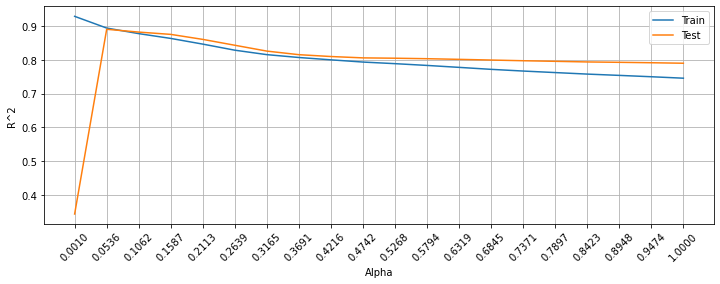

In [57]:
#Визуализируем изменение R^2 в зависимости от alpha
fig, ax = plt.subplots(figsize=(12, 4)) #фигура + координатная плоскость
ax.plot(alpha_list, train_scores, label='Train') #линейный график для тренировочной выборки
ax.plot(alpha_list, test_scores, label='Test') #линейный график для тестовой выборки
ax.set_xlabel('Alpha') #название оси абсцисс
ax.set_ylabel('R^2') #название оси ординат
ax.grid() #добави сетку
ax.set_xticks(alpha_list) #метки по оси абсцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды

С помощью графика мы можем подобрать оптимальное значение параметра `alpha`. Нам нужна такая точка на оси абсцисс, при которой на тестовой выборке наблюдается максимальная метрика и при этом разница между метриками на тренировочной и тестовой выборках минимальна.

Видно, что `R^2` на тестовой выборке достигает наибольшего значения в точке `0.0536`. Причём в этой точке наблюдается примерное равенство метрик на каждом наборе данных. Далее метрика на тестовой выборке начинает падать.

Обратите внимание, что на тренировочной выборке  непрерывно падает с ростом `alpha`. Оно и понятно, ведь чем больше `alpha`, тем сильнее регуляризация и тем меньше модель подстраивается под обучающую выборку.

Давайте подставим значение `alpha=0.0536` в модель `Lasso` и получим результат:

In [58]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=0.0536)
#Обучаем модель 
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.894
Test R^2: 0.890


Итак, метрика `R^2` выросла благодаря тому, что мы смогли подобрать оптимальное значение параметра `alpha`.

<img src=ml2_img63.png>

# 6. Линейная регрессия. Практика <a class="anchor" id=6></a>

[к содержанию](#0)

## Чтение данных, читка отбор, вся хуйня.

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [2]:
data = pd.read_csv('insurance.zip')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Итак, набор данных содержит следующие столбцы:

* `age` — возраст основного бенефициара;
* `sex` — пол страхового подрядчика;
* `bmi` — индекс массы тела (кг/м), в идеале — от 18.5 до 24.9;
* `children` — количество детей, охваченных медицинской страховкой;
* `smoker` — является ли человек курящим;
* `region` — жилой район США (северо-восток, юго-восток, северо-запад, юго-запад);
* `charges` (целевой признак) — индивидуальные медицинские расходы, оплачиваемые медицинской страховкой.

In [6]:
# еcть ли пропуски
data.isnull().any().any()

False

In [7]:
# типы данных
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Прежде чем приступать к этапу подготовки данных для модели, вы можете произвести небольшое исследование зависимостей в данных, например построить следующие графики и диаграммы:

* гистограммы/коробчатые диаграммы числовых признаков;
* столбчатые диаграммы медианных медицинских расходов в зависимости от категориальных признаков;
* диаграммы рассеяния зависимости целевого признака от других числовых в разрезе категориальных (обратите особенное внимание на зависимость медицинских расходов от признака курения).

Мы знаем, что модель линейной регрессии не умеет работать с категориальными признаками, поэтому категории **необходимо перекодировать**.

Кодировку будем совершать по следующему принципу:

* `smoker` — переведём в бинарные значения (`0` — некурящий, `1` — курящий);
* `sex` — аналогично (`0` — female, `1` — male);
* `region` — используем OneHot-кодирование (воспользуемся функцией `get_dummies`).

In [8]:
data['smoker'] = data['smoker'].apply(lambda x: 0 if x=='no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x=='female' else 1)
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


Итак, мы получили перекодированную таблицу, в которой все признаки являются числовыми.

Выделим факторы и целевой признак в отдельные таблицы:

In [9]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

In [14]:
#Разделяем выборку на тренировочную и тестовую в соотношении 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))
print('y_train: {}'.format(y_train.shape))
print('y_test: {}'.format(y_test.shape))

Train shape: (1070, 9)
Test shape: (268, 9)
y_train: (1070,)
y_test: (268,)


In [16]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#Обучаем модель - ищем параметры
lr.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)
print('w0: {}'.format(lr.intercept_))

Train R^2: 0.742
Train MAE: 4208.235
Train MAPE: 42.203


Test R^2: 0.784
Test MAE: 4181.194
Train MAPE: 46.888
w0: -12390.804294570275


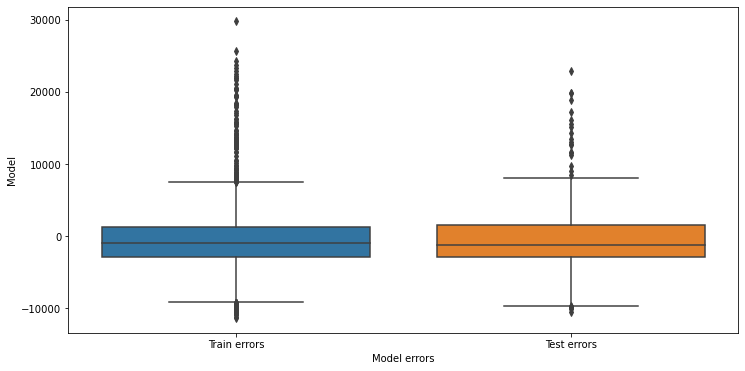

In [18]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура+координатная плоскость

y_train_errors = y_train - y_train_pred

y_test_errors = y_test - y_test_pred
predict_df = pd.DataFrame(
    {'Train errors':y_train_errors,
     'Test errors':y_test_errors
    }
)

sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

In [26]:
#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Создаем объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признак
poly.fit(X_train_scaled)
#Производим преобразование для каждой из выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))

Train shape: (1070, 54)
Test shape: (268, 54)


In [27]:
lr_1 = linear_model.LinearRegression()
#Обучаем модель - ищем параметры
lr_1.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = lr_1.predict(X_train_scaled_poly)
y_test_pred = lr_1.predict(X_test_scaled_poly)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)
print('w0: {}'.format(lr.intercept_))

Train R^2: 0.842
Train MAE: 2882.546
Train MAPE: 29.183


Test R^2: 0.867
Test MAE: 2720.547
Train MAPE: 29.982
w0: -12390.804294570275


In [30]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
#Обучаем модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок

print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))
print("Test MAE: {:.3f}".format(metrics.mean_absolute_error(y_test, y_test_predict_poly)))
print("Test MAPE: {:.3f}".format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly)*100))

Test R^2: 0.867
Test MAE: 2719.334
Test MAPE: 30.070


In [32]:
#Инициализируем объект класса линейная регрессия с L2-регуляризацией 
ridge_lr_poly = linear_model.Ridge()
#Обучаем модель предсказывать логарифм целевого признака
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = ridge_lr_poly.predict(X_train_scaled_poly)
y_test_pred = ridge_lr_poly.predict(X_test_scaled_poly)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.839
Train MAE: 2948.804
Train MAPE: 29.546


Test R^2: 0.863
Test MAE: 2860.555
Train MAPE: 31.380


# 7. Итоги <a class="anchor" id=7></a>

[к содержанию](#0)

## ДОПОЛНИТЕЛЬНО:

* [Десять датасетов для практики работы с линейной регрессией](https://www.telusinternational.com/articles/10-open-datasets-for-linear-regression)
* [Базовые принципы машинного обучения на примере линейной регрессии](https://habr.com/ru/company/ods/blog/322076/)
* [Регрессионные модели в Python](https://nagornyy.me/it/regressionnye-modeli-v-python/)